# Oily Giant Mining Company

Using machine learning and the bootstrapping technique, the task is the find the best place for a new oil well. This is dependent on the volume of reserves and the profitability of different regions.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General Information</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model Testing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Profitability-Analysis" data-toc-modified-id="Profitability-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Profitability Analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-Conclusion" data-toc-modified-id="Final-Conclusion-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Final Conclusion</a></span></li></ul></div>

## General Information

 Region 1


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507


f0         0
f1         0
f2         0
product    0
dtype: int64


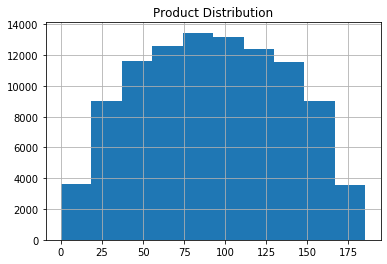

 Region 2


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261


f0         0
f1         0
f2         0
product    0
dtype: int64


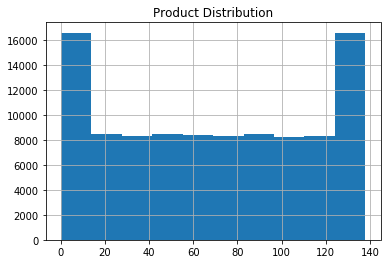

 Region 3


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441


f0         0
f1         0
f2         0
product    0
dtype: int64


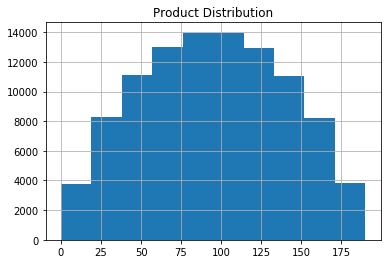

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

geo_0= pd.read_csv('/datasets/geo_data_0.csv')
geo_1=pd.read_csv('/datasets/geo_data_1.csv')
geo_2=pd.read_csv('/datasets/geo_data_2.csv')

geo_0 = geo_0.drop(['id'],axis=1)
geo_1 = geo_1.drop(['id'],axis=1)
geo_2 = geo_2.drop(['id'],axis=1)

def prepare(i,region):
       print("\033[1m",'Region', region) 
       display(i.describe().head())
       print(i.isnull().sum())
       i['product'].hist()
       plt.title('Product Distribution')
       plt.show()
prepare(geo_0,1)
prepare(geo_1,2)
prepare(geo_2,3)

### Conclusion

Using pandas function pd.read_csv() the datasets were loaded. The function isnull() was used to check if the data had any missing values , which it didn't. Describe() was also called to check for any extreme values in each dataset. Looking at the dataset, the id column was removed as it was not necessary for model training. The product distributions for each region was plotted with the histogram function. It shows that region 1 and 3 the product distribution is centered around 75 to 100 units of product. However, region 2 has product that is dispered with the more extreme values close to zero and close to 140 units having the highest range of wells that fall into those values

## Model Testing

In [2]:
def model_testing(types):
    u_train, u_valid = train_test_split(types,test_size=0.25,random_state=12345)
    features_t = u_train.drop(['product'],axis=1)
    target_t = u_train['product']

    features_v = u_valid.drop(['product'],axis=1)
    target_v= u_valid['product']

    num=types.columns[types.dtypes!='object'].drop(['product'])

    scaler = StandardScaler()
    scaler.fit(features_t[num])
    features_train_s = scaler.transform(features_t[num])
    features_valid_s = scaler.transform(features_v[num]) 


    model= LinearRegression()
    model.fit(features_train_s,target_t)
    predict=model.predict(features_valid_s)
    score=model.score(features_valid_s,target_v)
    score_f = "{:.2f}".format(score)
    average_volume_predicted = predict.mean()
    avg_p =  "{:.2f}".format(average_volume_predicted)
    mse = mean_squared_error(target_v, predict)
    rmse =  np.sqrt(mse)
    rmse_f = "{:.2f}".format(rmse)
    return score_f, avg_p ,rmse_f, predict,target_v,mse
    
geo_0_test=model_testing(geo_0)
geo_1_test= model_testing(geo_1)
geo_2_test=model_testing(geo_2)

print('Model Scores for each region :','\nRegion 1:',geo_0_test[0],'\nRegion 2:',geo_1_test[0],
      '\nRegion 3:',geo_2_test[0])
print('\nAverage predicted volume for each region:','\nRegion 1:',geo_0_test[1],'\nRegion 2:',geo_1_test[1],
      '\nRegion 3:',geo_2_test[1])
print('\nRMSE for each region:','\nRegion 1:',geo_0_test[2],'\nRegion 2:',geo_1_test[2],
      '\nRegion 3:',geo_2_test[2])

geo_0_features_target = geo_0_test[3],geo_0_test[4]
geo_1_features_target = geo_1_test[3],geo_1_test[4]
geo_2_features_target = geo_2_test[3],geo_2_test[4]


Model Scores for each region : 
Region 1: 0.28 
Region 2: 1.00 
Region 3: 0.21

Average predicted volume for each region: 
Region 1: 92.59 
Region 2: 68.73 
Region 3: 94.97

RMSE for each region: 
Region 1: 37.58 
Region 2: 0.89 
Region 3: 40.03


### Conclusion

As there were three different datasets, the model testing was quicker to perform when turning it into a function. The target we are trying to predict is product, thus the columns were seperated into features and target. The dataset was also split into the training and validation set using train_test_split, with a 75:25 ratio. The data was standaradised using a standard scaler to normalise the data in the features column by arranging the data around a standard normal distribution.

Linear regression was used on the data and thus the model score, the average predicted product and the RMSE (from square-rooting mean_squared_error). The model scores for each region makes a point that the model may not be accurate for region 1 and 3 as the model score is very low but it is very high for region 2. The average predicted volume for region 1 and 3 is 92 and 94 respectively, while it is 68 for region 2. Considering the low model score for region 1 and 3, these figures may not be accurate compared to region 2's figure.

The RMSE for region 1 and 3 is 37 and 40 respectively. This highlights the residuals  for those regions is spread out round the line of best fit. This very much differs to region 2, whose RMSE is 0.8. Here region 2's residuals are very concerntrated around the line of best fit, the residuals do not deviate far. As a lower RMSE indicates a better fit, this is consistent with region 2 having a better model score than region 1 or 3.

## Profitability Analysis

In [3]:
no_loss_well = (100000000/4500)/200
print('Volume of reserves sufficient for developing a new well:',no_loss_well)

budget_for_development = 100000000

cost_per_well = 100000000/200

revenue  = 4500

Volume of reserves sufficient for developing a new well: 111.11111111111111


### Conclusion

As the task is to find a region to develop a new well, the minimum volume of reserves sufficient to make a profit on a new well is important. The cost of oil development is 100 million USD, the revenue one unit of reserves is 4500 USD and the output would be from 200 wells. Thus, the volume of reserves sufficient for developing a new well without losses is 111 units of reserves. This amount is much higher than the average predicted volume of reserves, the closest region being region 3 (with average volume of 94) but this is still 17 units below required. New well development from any region seems loss-making.

In [4]:
def profit(predictions,target,number,cost):
    pred = []
    for i in predictions:
        pred.append(i)
    predic = pd.Series(pred).reset_index(drop=True).sort_values(ascending=False).head(number)
    pre_tar = target.reset_index(drop=True).iloc[predic.index]
    revenue = pre_tar.sum() * 4500
    cost = number*cost
    profit = revenue - cost
    return profit

profit1 = profit(geo_0_features_target[0],geo_0_features_target[1],200,cost_per_well)
profit2= profit(geo_1_features_target[0],geo_1_features_target[1],200,cost_per_well)
profit3 = profit(geo_2_features_target[0],geo_2_features_target[1],200,cost_per_well)

print('Profit for each region:\n','\nRegion 1: \n',profit1,'\nRegion 2: \n',profit2,'\nRegion 3 :\n',profit3)

Profit for each region:
 
Region 1: 
 33208260.431398526 
Region 2: 
 24150866.966815114 
Region 3 :
 27103499.635998324


### Conclusion
To work out the profit for each region, a function was created. This used the predictions made in the model testing to index those values to the corresponding true target value. The revenue variable was the sum of these targets mutliplied by the revenue from one unit of product-4500 USD. This was minus the cost from developing a new well for 200 wells, which totalled the profits of each region. Region 1 had the highest profit of 33 million compared to region 2 (24 million) and region 3 (27 million). Thus, region 1 should be be top priority for oil well development since it returns the highest profit and profitability is the companies objective in this report.

In [5]:
def bootstrap(target_boot,predict_boot,region):
    print('\nRegion:',region)
    state = np.random.RandomState(12345)
    values = []
    volume = []
    for i in range(1000):
        target_sub=target_boot.reset_index(drop=True).sample(replace=True,random_state=state,n=500)
        probs_sub = pd.Series(predict_boot).iloc[target_sub.index]
        values.append(profit(probs_sub,target_sub,200,cost_per_well))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print('Average profit:',values.mean())
    print('95% Confidence Interval:', lower,'--',upper)
    neg = (values < 0).sum() /len(values)
    loss = neg*100
    print('Risk of loss:',loss,'%')

bootstrap(geo_0_features_target[1],geo_0_features_target[0], 1)
bootstrap(geo_1_features_target[1],geo_1_features_target[0], 2)
bootstrap(geo_2_features_target[1],geo_2_features_target[0], 3)



Region: 1
Average profit: 3961649.8480237112
95% Confidence Interval: -1112155.4589049604 -- 9097669.415534232
Risk of loss: 6.9 %

Region: 2
Average profit: 4560451.057866608
95% Confidence Interval: 338205.0939898603 -- 8522894.538660347
Risk of loss: 1.5 %

Region: 3
Average profit: 4044038.6656835675
95% Confidence Interval: -1633504.1339559837 -- 9503595.749237997
Risk of loss: 7.6 %


### Conclusion
Here the bootstrap techinque was used to find the distribution of profit using 1000 samples. This was done by creating new target and prediction variables in the function and using them in the previous function of profit calculation.  In order to get a range of values that fufill the 95% confidence interval these values were seperated into a lower quartile of .025 of the values and upper quartile of the .975 of the values. The average profit was also found. Compared to the prior profitability calculation, in the bootstrap method, region 2 has the highest profit of 45 million, while region 1 had the lowest profit of 39 million. Additionally, region 2 was the only region that had a positive confidence interval. For all other regions, the confidence interval was in the negative, showing in some instances there could be great losses. At least region 2 at its lowest profit will turn a positive profit.

In order to evaluate the risk of loss, a risk calculation was created by summing the values below zero and finding the proportion of those values against all of the values. Followinf tihs region 3 has the highest risk with 7.6% and region 1 has a 6.9% risk. Region 2 has the lowest risk of 1.5%. Considering the instruction to only keep regions with a risk of loss lower than 2.5%, region 2 is the only region left, hence the best region for new oil development.

## Final Conclusion

To conclude the best region for oil development is region 2. It satifies the maximum constraint for risk, with the boostrap method it returns the highest profit and it has a low RSME. These factors highlight that the results are accurate to reality. However, the predicted volume for each region was lower than the volume needed to not make a loss. Therefore, a loss could still occur with region 2 if a new oil well is developed.